# **Training Model with Ensemble Learning Algorithm**

### **Import Librairies and Dataset**

In [1]:
# Import dataset

file_score = "../DATAS/Label_ProfilS_ML.csv"

In [2]:
# Imports Libairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import joblib

import warnings

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, LabelBinarizer, label_binarize
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 


In [3]:
# Import Modèles

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

In [4]:
df_score = pd.read_csv(file_score)
C_df_score = df_score.copy()
C_df_score

,mstat,rev_total_mois,age_grp,empl_formel,bancarise,a_assurance,logem,Profil_Score
0,0,279244.0,2,1,1,0,1,52
1,0,0.0,0,0,0,0,1,30
2,0,0.0,0,0,0,0,1,30
3,0,0.0,0,0,0,0,1,30
4,2,0.0,2,0,0,0,1,49
...,...,...,...,...,...,...,...,...
64469,0,0.0,0,0,0,0,3,40
64470,0,0.0,0,0,0,0,3,40
64471,0,0.0,0,0,0,0,3,40
64472,0,0.0,0,0,0,0,3,40


### **Features and Target**

In [5]:
features = ['mstat', 'age_grp', 'bancarise', 'a_assurance', 'empl_formel', 'logem', 'rev_total_mois']
target = 'Profil_Score'

In [6]:
# Separation des caractérisques et de la cible

X = C_df_score.drop(columns=['Profil_Score'])
y = C_df_score['Profil_Score']

### **Train and Test Sets**

In [7]:
# Données d'entrainement et de test

X_train_n, X_test_n, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train :{X_train_n.shape}")
print(f"y_train :{y_train.shape}")
print(f"X_test :{X_test_n.shape}")
print(f"y_test :{y_test.shape}")

X_train :(51579, 7)
y_train :(51579,)
X_test :(12895, 7)
y_test :(12895,)


## **Ensemble Learning Algorithm**

### **BaggingRegressor with RandomForestRegressor**

In [8]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [9]:
bagging = BaggingRegressor(
    estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train_n, y_train)
y_pred_bag = bagging.predict(X_test_n)
print("Bagging RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_bag)))
print("Bagging R2:", r2_score(y_test, y_pred_bag))


Bagging RMSE: 2.071793219331924
Bagging R2: 0.9765981435713679


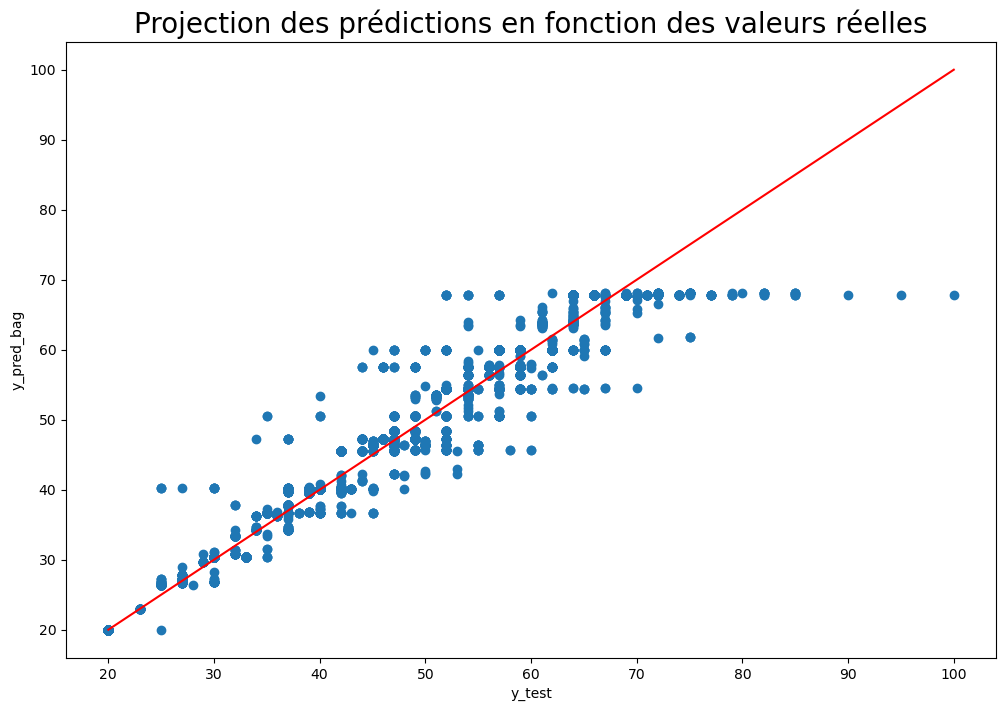

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, y_pred_bag)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred_bag')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

In [11]:
dat = pd.DataFrame([{'mstat':0, 'rev_total_mois':279244.0, 'age_grp':2, 'empl_formel':1, 'bancarise':1, 'a_assurance':0, 'logem':1},
                    {'mstat':0, 'rev_total_mois':380000.00,   'age_grp':3, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':1},
                    {'mstat':2, 'rev_total_mois':0.00,    'age_grp':2, 'empl_formel':0, 'bancarise':1, 'a_assurance':0, 'logem':1},
                    {'mstat':2, 'rev_total_mois':200000.00,   'age_grp':3, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':1},
                    {'mstat':0, 'rev_total_mois':0.00,    'age_grp':0, 'empl_formel':0, 'bancarise':0, 'a_assurance':1, 'logem':1},
                    {'mstat':2, 'rev_total_mois':0.00,   'age_grp':4, 'empl_formel':0, 'bancarise':1, 'a_assurance':1, 'logem':1},
                    {'mstat':2, 'rev_total_mois':316733.34,   'age_grp':4, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':1}
    ])
dat

#dat['Profil_Score'] = [52, 75, 44, 70, 33, 62, 75]

,mstat,rev_total_mois,age_grp,empl_formel,bancarise,a_assurance,logem
0,0,279244.00,2,1,1,0,1
1,0,380000.00,3,1,1,1,1
2,2,0.00,2,0,1,0,1
3,2,200000.00,3,1,1,1,1
4,0,0.00,0,0,0,1,1
5,2,0.00,4,0,1,1,1
6,2,316733.34,4,1,1,1,1


In [12]:
dat['Profil_Score'] = [52, 75, 44, 70, 33, 62, 75]
dat_p = dat.drop(columns=['Profil_Score'])
y_d = dat['Profil_Score']
y_d

0    52
1    75
2    44
3    70
4    33
5    62
6    75
Name: Profil_Score, dtype: int64

In [13]:
pre_rf = bagging.predict(dat_p)
pre_rf

array([45.61611429, 45.61611429, 57.53063538, 66.90013092, 30.3229383 ,
       57.53063538, 68.13217005])

In [14]:
rms = np.sqrt(mean_squared_error(y_d, pre_rf))
r = r2_score(y_d, pre_rf)

print(f"RMSE sur test : {rms}")
print(f"R2 sur test : {r}")

RMSE sur test : 12.934797949746306
R2 sur test : 0.26408070897331226


In [15]:
# Test intérieur du modèle extrait
datas = pd.DataFrame([
    {'mstat':0, 'rev_total_mois':0,        'age_grp':0, 'empl_formel':0, 'bancarise':0, 'a_assurance':0, 'logem':1, 'Profil_Score':28},
    {'mstat':1, 'rev_total_mois':50000,    'age_grp':1, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':2, 'Profil_Score':65},
    {'mstat':2, 'rev_total_mois':120000,   'age_grp':2, 'empl_formel':0, 'bancarise':1, 'a_assurance':0, 'logem':3, 'Profil_Score':78},
    {'mstat':3, 'rev_total_mois':250000,   'age_grp':3, 'empl_formel':1, 'bancarise':0, 'a_assurance':1, 'logem':0, 'Profil_Score':49},
    {'mstat':4, 'rev_total_mois':400000,   'age_grp':4, 'empl_formel':0, 'bancarise':1, 'a_assurance':1, 'logem':2, 'Profil_Score':85},
    {'mstat':5, 'rev_total_mois':30000,    'age_grp':5, 'empl_formel':1, 'bancarise':0, 'a_assurance':1, 'logem':3, 'Profil_Score':62},
    {'mstat':2, 'rev_total_mois':900000,   'age_grp':6, 'empl_formel':0, 'bancarise':1, 'a_assurance':0, 'logem':2, 'Profil_Score':91},
    {'mstat':0, 'rev_total_mois':150000,   'age_grp':1, 'empl_formel':0, 'bancarise':0, 'a_assurance':0, 'logem':0, 'Profil_Score':33},
    {'mstat':4, 'rev_total_mois':80000,    'age_grp':5, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':1, 'Profil_Score':72},
    {'mstat':1, 'rev_total_mois':1000000,  'age_grp':0, 'empl_formel':0, 'bancarise':0, 'a_assurance':0, 'logem':2, 'Profil_Score':38},
    {'mstat':5, 'rev_total_mois':290000,   'age_grp':3, 'empl_formel':1, 'bancarise':1, 'a_assurance':0, 'logem':3, 'Profil_Score':70},
    {'mstat':1, 'rev_total_mois':750000,   'age_grp':4, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':0, 'Profil_Score':82},
    {'mstat':2, 'rev_total_mois':330000,   'age_grp':2, 'empl_formel':0, 'bancarise':0, 'a_assurance':1, 'logem':2, 'Profil_Score':55},
    {'mstat':0, 'rev_total_mois':200000,   'age_grp':1, 'empl_formel':1, 'bancarise':0, 'a_assurance':1, 'logem':1, 'Profil_Score':60},
    {'mstat':5, 'rev_total_mois':50000,    'age_grp':6, 'empl_formel':1, 'bancarise':0, 'a_assurance':0, 'logem':3, 'Profil_Score':41},
    {'mstat':4, 'rev_total_mois':870000,   'age_grp':0, 'empl_formel':0, 'bancarise':1, 'a_assurance':1, 'logem':1, 'Profil_Score':78},
    {'mstat':3, 'rev_total_mois':20000,    'age_grp':1, 'empl_formel':1, 'bancarise':1, 'a_assurance':0, 'logem':0, 'Profil_Score':44},
    {'mstat':2, 'rev_total_mois':450000,   'age_grp':3, 'empl_formel':0, 'bancarise':1, 'a_assurance':1, 'logem':3, 'Profil_Score':80},
    {'mstat':0, 'rev_total_mois':35000,    'age_grp':5, 'empl_formel':1, 'bancarise':0, 'a_assurance':0, 'logem':2, 'Profil_Score':39},
    {'mstat':5, 'rev_total_mois':800000,   'age_grp':6, 'empl_formel':1, 'bancarise':1, 'a_assurance':1, 'logem':2, 'Profil_Score':95}
])
datas

,mstat,rev_total_mois,age_grp,empl_formel,bancarise,a_assurance,logem,Profil_Score
0,0,0,0,0,0,0,1,28
1,1,50000,1,1,1,1,2,65
2,2,120000,2,0,1,0,3,78
3,3,250000,3,1,0,1,0,49
4,4,400000,4,0,1,1,2,85
5,5,30000,5,1,0,1,3,62
6,2,900000,6,0,1,0,2,91
7,0,150000,1,0,0,0,0,33
8,4,80000,5,1,1,1,1,72
9,1,1000000,0,0,0,0,2,38


In [16]:
datas_p = datas.drop(columns=['Profil_Score'])
y_datas = datas['Profil_Score']
y_datas

0     28
1     65
2     78
3     49
4     85
5     62
6     91
7     33
8     72
9     38
10    70
11    82
12    55
13    60
14    41
15    78
16    44
17    80
18    39
19    95
Name: Profil_Score, dtype: int64

In [17]:
pred_b = bagging.predict(datas_p)
pred_b

array([30.3229383 , 54.9666125 , 67.80162993, 42.17660987, 67.80162993,
       48.3351501 , 67.80162993, 31.0438191 , 65.2355755 , 40.78826454,
       56.43677258, 43.66256677, 59.95661186, 36.65971221, 48.3351501 ,
       66.56520346, 47.2570405 , 67.80162993, 46.38135731, 56.43677258])

In [18]:
rmse_T = np.sqrt(mean_squared_error(y_datas, pred_b))
r2_T = r2_score(y_datas, pred_b)

print(f"RMSE sur test : {rmse_T}")
print(f"R2 sur test : {r2_T}")

RMSE sur test : 16.497419028562526
R2 sur test : 0.3158034513302279


### **Boosting with GradientBoostingRegressor**

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
boosting.fit(X_train_n, y_train)
y_pred_boost = boosting.predict(X_test_n)
print("Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_boost)))
print("Boosting R2:", r2_score(y_test, y_pred_boost))

Boosting RMSE: 0.3708834709865755
Boosting R2: 0.9992500497515094


#### Tests

In [20]:
pre_boost = boosting.predict(dat_p)
pre_boost

array([52.36251193, 62.84366504, 56.10204981, 69.43143629, 32.79961547,
       61.50617378, 74.98035605])

In [21]:
rmse_boos = np.sqrt(mean_squared_error(y_d, pre_boost))
r2_boos = r2_score(y_d, pre_boost)

print(f"RMSE sur test : {rmse_boos}")
print(f"R2 sur test : {r2_boos}")

RMSE sur test : 6.491479833893638
R2 sur test : 0.8146475573376534


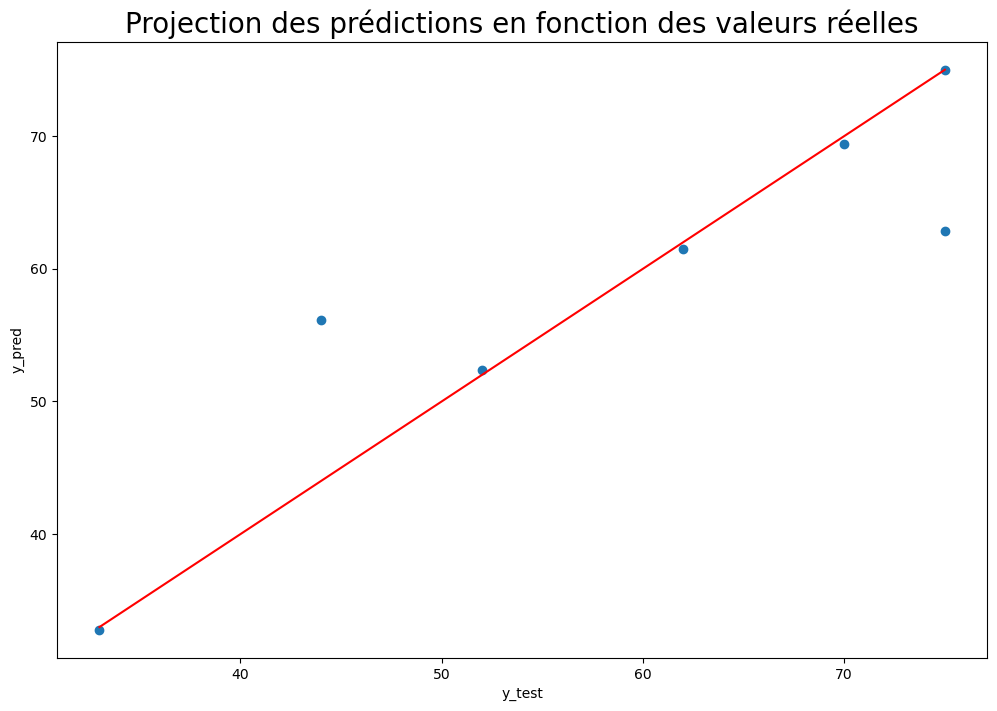

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_d, pre_boost)
ax.plot([y_d.min(), y_d.max()], [y_d.min(), y_d.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

0    52
1    75
2    44
3    70
4    33
5    62
6    75

In [23]:
pred_bo = boosting.predict(datas_p)
pred_bo

array([30.05957298, 64.70695849, 70.55423037, 45.31753389, 80.57589689,
       53.3103527 , 81.26368562, 28.48649526, 66.17002101, 52.92255681,
       66.62348664, 62.63907272, 69.20124125, 41.19200581, 53.46621337,
       70.36808031, 35.4977924 , 81.09492723, 49.30266184, 77.67599176])

In [24]:
rmse_boo = np.sqrt(mean_squared_error(y_datas, pred_bo))
r2_boo = r2_score(y_datas, pred_bo)

print(f"RMSE sur test : {rmse_boo}")
print(f"R2 sur test : {r2_boo}")

RMSE sur test : 10.42908609716476
R2 sur test : 0.7265730149336637


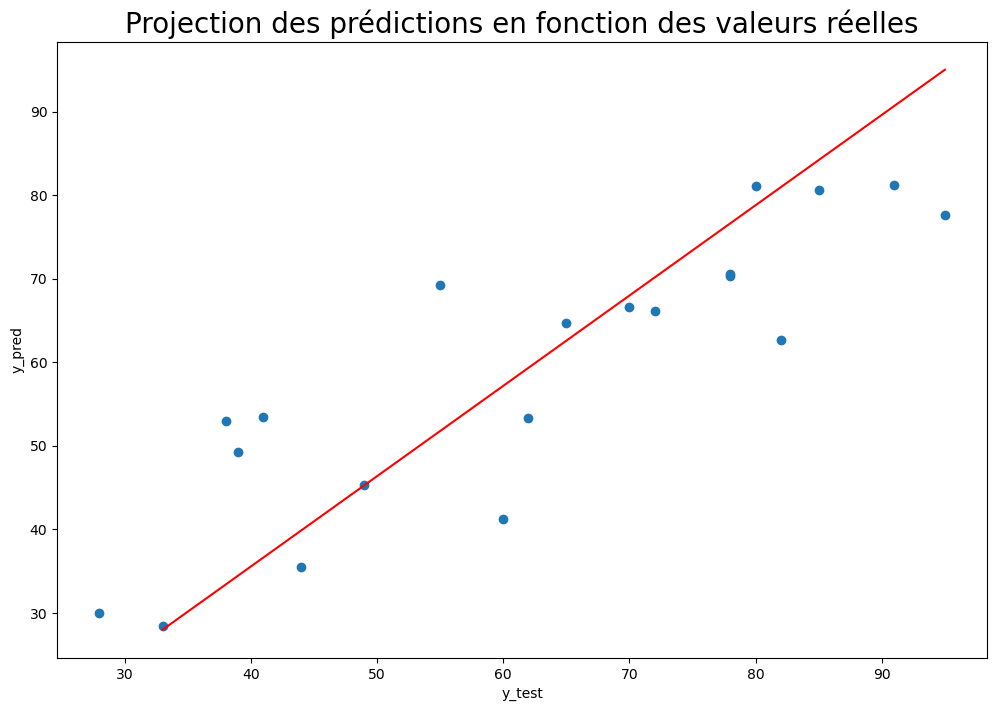

In [25]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_datas, pred_bo)
ax.plot([y_d.min(), y_datas.max()], [y_datas.min(), y_datas.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

#### Search HyperParameter

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error'
)

grid_search_gb.fit(X_train_n, y_train)

print("🧠 Meilleurs paramètres GB:", grid_search_gb.best_params_)
print("📉 Score RMSE (CV):", -grid_search_gb.best_score_)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=0.7; total time=  12.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   7.8s
[CV] END l

#### Retraining the model with the hyperparameter

In [ ]:
# Évaluation sur le test set avec meilleur modèle
best_params_boost = grid_search_gb.best_params_

In [ ]:
# GradientBoostingRegressor
best_boost = GradientBoostingRegressor(**best_params_boost, random_state=42)
best_boost.fit(X_train_n, y_train)

#### Features Importances and Performances of model

In [ ]:
if hasattr(best_boost, "feature_importances_"):
        importances = best_boost.feature_importances_
        import_df = pd.DataFrame({'variable': features, 'importance': importances}).sort_values(by='importance', ascending=False)
        print("          Importance des variables :\n", import_df)
        plt.figure(figsize=(10, 6))
        plt.barh(import_df['variable'], import_df['importance'], color='steelblue')
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'📊 Importance des Variables', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

In [ ]:
# Prédictions
y_pred_rboost = best_boost.predict(X_test_n)

# Scores
rmse_rboost = np.sqrt(mean_squared_error(y_test, y_pred_rboost))
r2_rboost = r2_score(y_test, y_pred_rboost)

print(f"XGBRegressor - RMSE: {rmse_rboost}, R2: {r2_rboost}")

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, y_pred_rboost)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

#### Other set

In [ ]:
pred_xboost = best_boost.predict(datas_p)
pred_xboost

0     28
1     65
2     78
3     49
4     85
5     62
6     91
7     33
8     72
9     38
10    70
11    82
12    55
13    60
14    41
15    78
16    44
17    80
18    39
19    95

In [ ]:
rmse_rb = np.sqrt(mean_squared_error(y_datas, pred_xboost))
r2_rb = r2_score(y_datas, pred_xboost)

print(f"Gradient - RMSE: {rmse_rb}, R2: {r2_rb}")

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_datas, pred_xboost)
ax.plot([y_datas.min(), y_datas.max()], [y_datas.min(), y_datas.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

In [ ]:
if hasattr(best_boost, "feature_importances_"):
        importances = best_boost.feature_importances_
        import_df = pd.DataFrame({'variable': features, 'importance': importances}).sort_values(by='importance', ascending=False)
        print("          Importance des variables :\n", import_df)
        plt.figure(figsize=(10, 6))
        plt.barh(import_df['variable'], import_df['importance'], color='steelblue')
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'📊 Importance des Variables', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

### **Boosting with XGBRegressor**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

boosting = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
boosting.fit(X_train_n, y_train)
y_pred_boost = boosting.predict(X_test_n)
print("Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_boost)))
print("Boosting R2:", r2_score(y_test, y_pred_boost))

In [ ]:
if hasattr(boosting, "feature_importances_"):
        importances = boosting.feature_importances_
        import_df = pd.DataFrame({'variable': features, 'importance': importances}).sort_values(by='importance', ascending=False)
        print("          Importance des variables :\n", import_df)
        plt.figure(figsize=(10, 6))
        plt.barh(import_df['variable'], import_df['importance'], color='steelblue')
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'📊 Importance des Variables', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

In [ ]:
pred_boosting = boosting.predict(datas_p)
pred_boosting

#### Search HyperParameter

In [ ]:
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

random_search_xgb.fit(X_train_n, y_train)

print("🧠 Meilleurs paramètres XGB:", random_search_xgb.best_params_)
print("📉 Score RMSE (CV):", -random_search_xgb.best_score_)

#### Retraining model

In [ ]:
# Évaluation sur le test set avec meilleur modèle
best_par_bX = random_search_xgb.best_params_

In [ ]:
# XGBRegressor
best_bX = XGBRegressor(**best_par_bX, random_state=42)
best_bX.fit(X_train_n, y_train)

In [ ]:
if hasattr(best_bX, "feature_importances_"):
        importances = best_bX.feature_importances_
        import_df = pd.DataFrame({'variable': features, 'importance': importances}).sort_values(by='importance', ascending=False)
        print("          Importance des variables :\n", import_df)
        plt.figure(figsize=(10, 6))
        plt.barh(import_df['variable'], import_df['importance'], color='steelblue')
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'📊 Importance des Variables', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

In [ ]:
# Prédictions
y_best_bX = best_bX.predict(X_test_n)

# Scores
rmse_best_bX = np.sqrt(mean_squared_error(y_test, y_best_bX))
r2_best_bX = r2_score(y_test, y_best_bX)

print(f"Boosting XGBRegressor - RMSE: {rmse_best_bX}, R2: {r2_best_bX}")

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, y_best_bX)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

#### Other Tests

In [ ]:
pred_xgbboost = best_bX.predict(datas_p)
pred_xgbboost

In [ ]:
rmseboost = np.sqrt(mean_squared_error(y_datas, pred_xgbboost))
r2boost = r2_score(y_datas, pred_xgbboost)

print(f"Gradient - RMSE: {rmseboost}, R2: {r2boost}")

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_datas, pred_xgbboost)
ax.plot([y_datas.min(), y_datas.max()], [y_datas.min(), y_datas.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

### **StackingRegressor with RandomForestRegressor and GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

stacking = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42))
    ],
    final_estimator=RidgeCV(),
    n_jobs=-1
)
stacking.fit(X_train_n, y_train)
y_pred_stack = stacking.predict(X_test_n)
print("Stacking RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))
print("Stacking R2:", r2_score(y_test, y_pred_stack))

In [ ]:
if hasattr(stacking, "feature_importances_"):
        importances = stacking.feature_importances_
        import_df = pd.DataFrame({'variable': features, 'importance': importances}).sort_values(by='importance', ascending=False)
        print("          Importance des variables :\n", import_df)
        plt.figure(figsize=(10, 6))
        plt.barh(import_df['variable'], import_df['importance'], color='steelblue')
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'📊 Importance des Variables', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

In [ ]:
pred_stack = stacking.predict(datas_p)
pred_stack